<a href="https://colab.research.google.com/github/raypratik9/End_to_End_ML_Model_Deployment/blob/main/LoanTap_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/003/549/original/logistic_regression.csv
To: /content/logistic_regression.csv
100% 100M/100M [00:06<00:00, 16.3MB/s] 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

In [3]:
df=pd.read_csv('logistic_regression.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.shape

(396030, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


Replacing Null Value with Mean or Mode

In [8]:
df.emp_length.fillna(df.emp_length.mode()[0],inplace=True)
df.revol_util.fillna(df.revol_util.mean(),inplace=True)
df.mort_acc.fillna(df.mort_acc.mode()[0],inplace=True)
df.pub_rec_bankruptcies.fillna(df.pub_rec_bankruptcies.mode()[0],inplace=True)

Dropping some unnecessary Features

In [9]:
df.drop(columns=['address','title','emp_title','issue_d','earliest_cr_line'],inplace=True)

PairPlot between Neumerical Variable

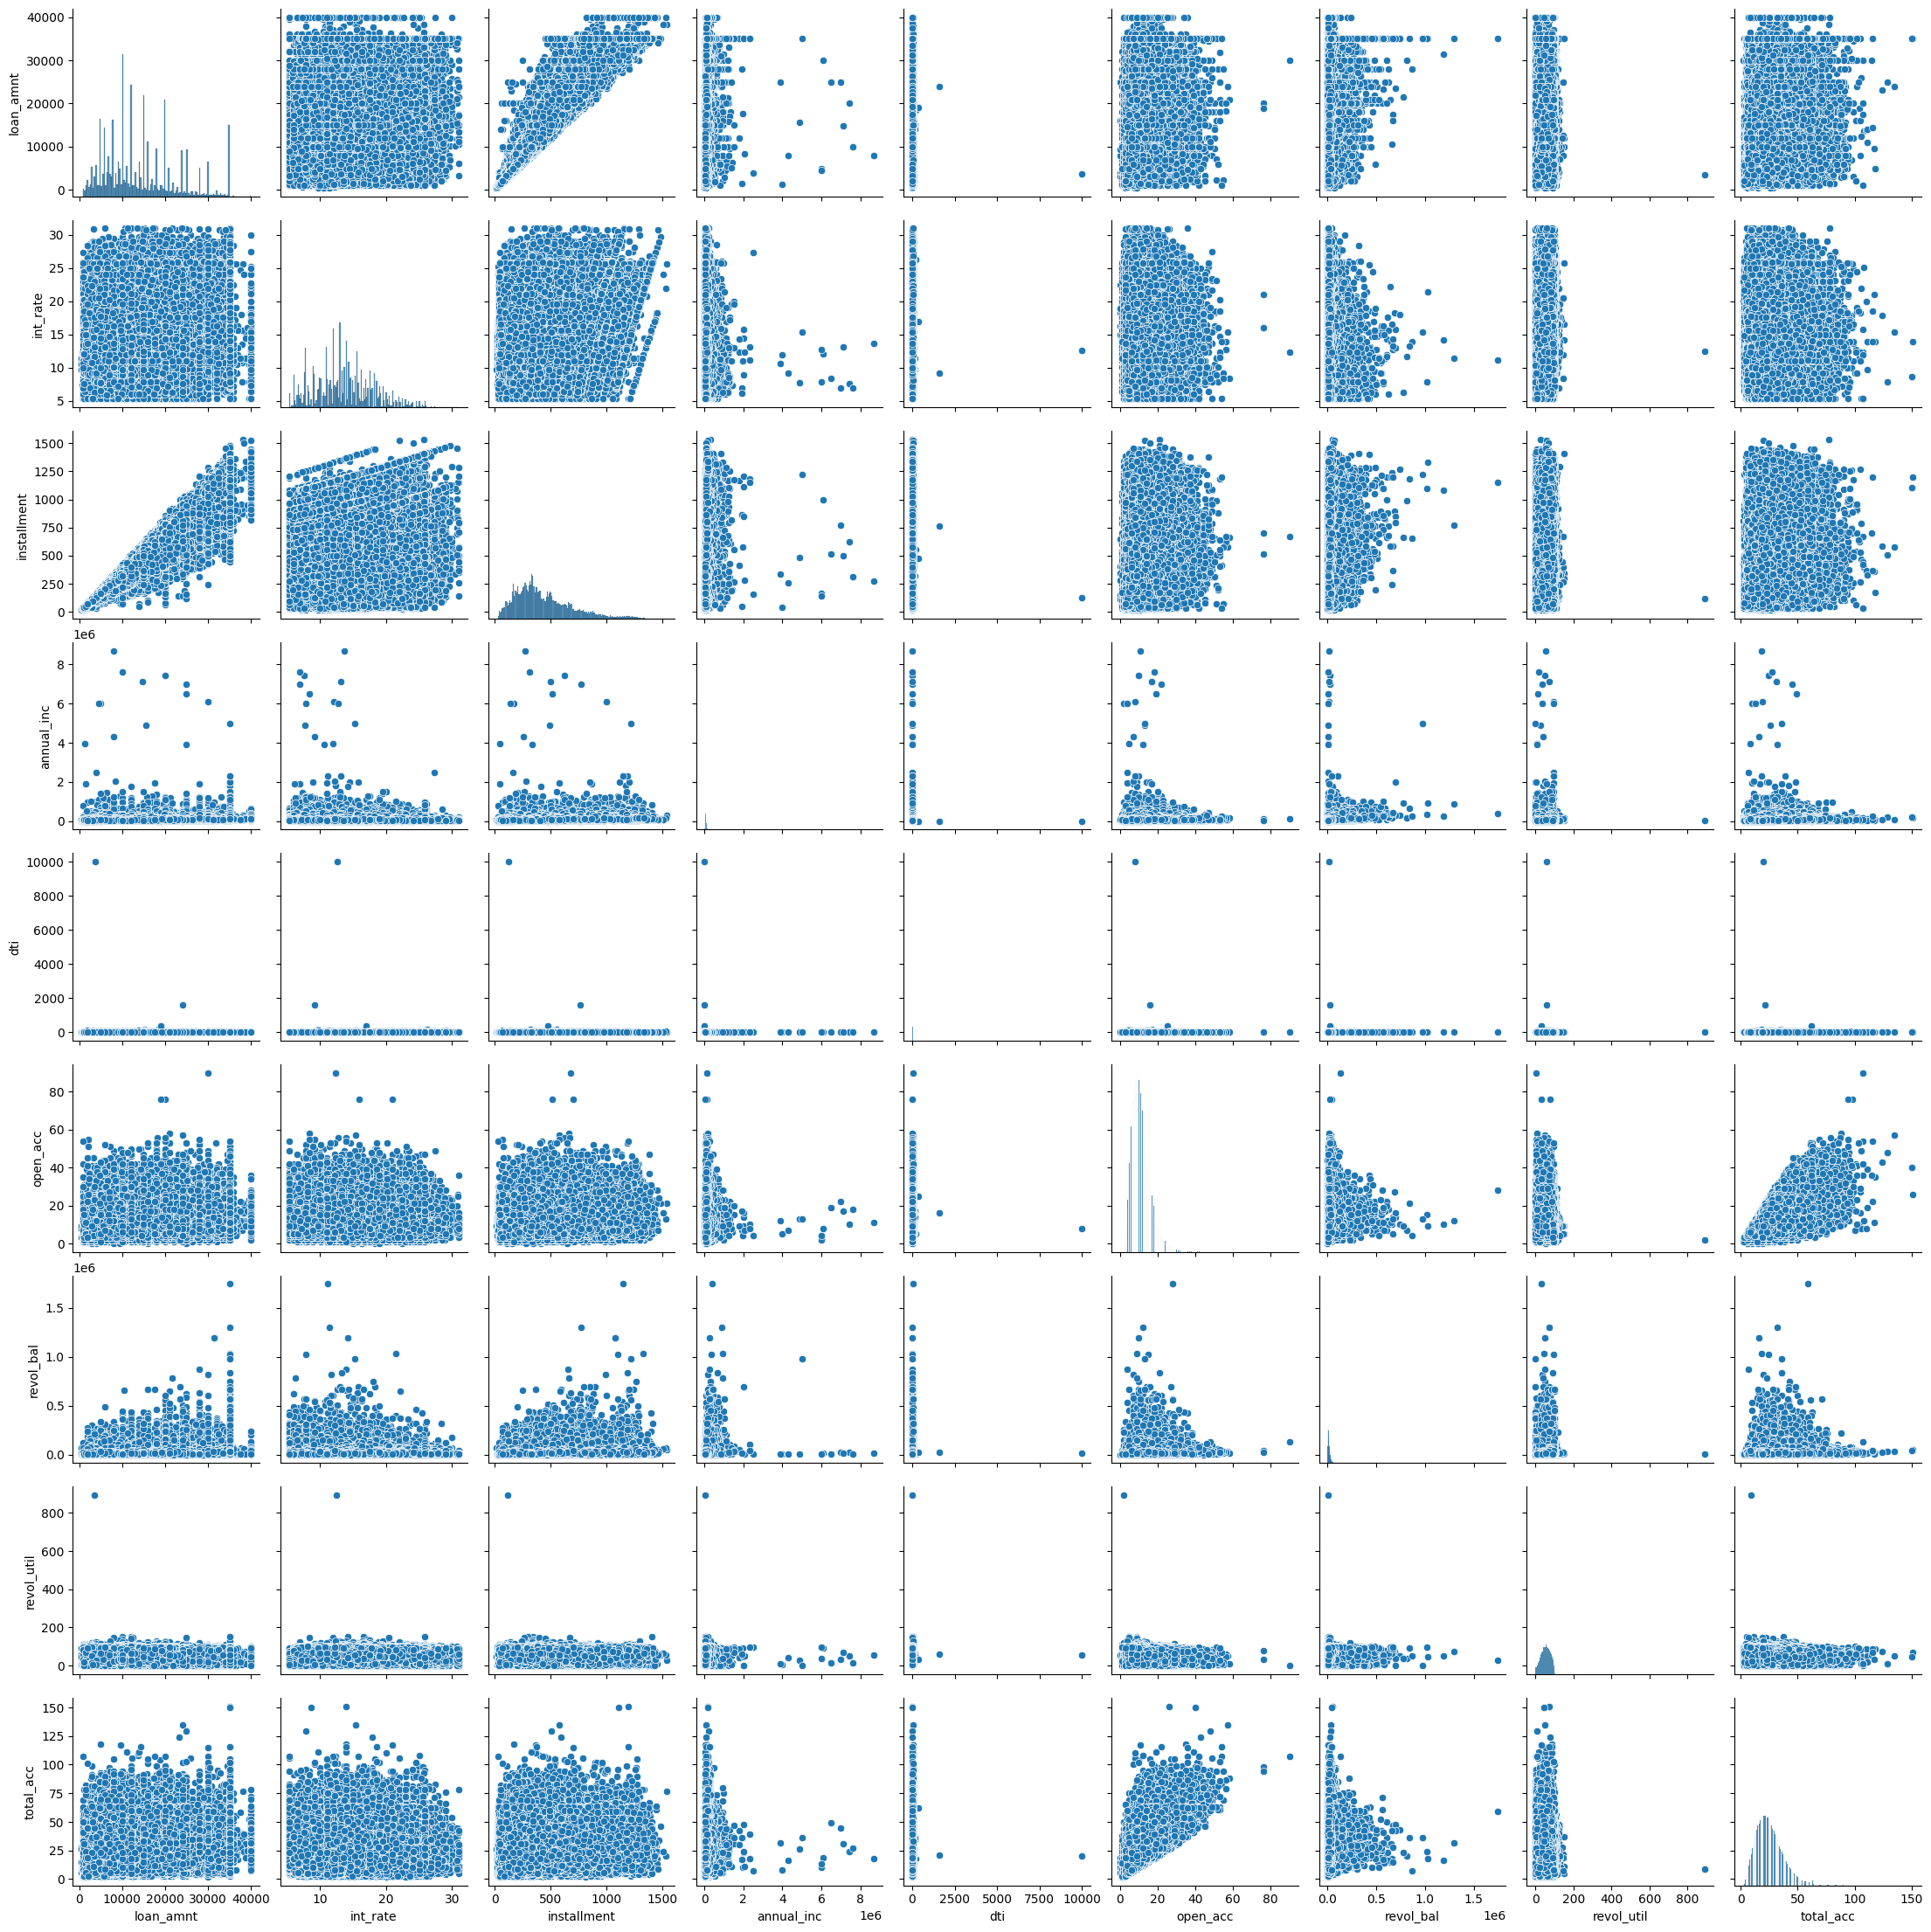

In [10]:
sns.pairplot(data=df[['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','revol_bal','revol_util','total_acc']])

In [11]:
cat_columns=['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','pub_rec','initial_list_status','application_type','mort_acc','pub_rec_bankruptcies']
for i in cat_columns:
    print('---------------',i,'---------------')
    print(df[i].value_counts())

--------------- term ---------------
term
 36 months    302005
 60 months     94025
Name: count, dtype: int64
--------------- grade ---------------
grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64
--------------- sub_grade ---------------
sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64
--------------- emp_length ---------------
emp_length
10+ years    144342
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 ye

In [12]:
num_columns=[]
for i in df.columns:
    if i not in cat_columns and i not in ['issue_d','earliest_cr_line','emp_title',]:
        num_columns.append(i)

Checking for Outlier

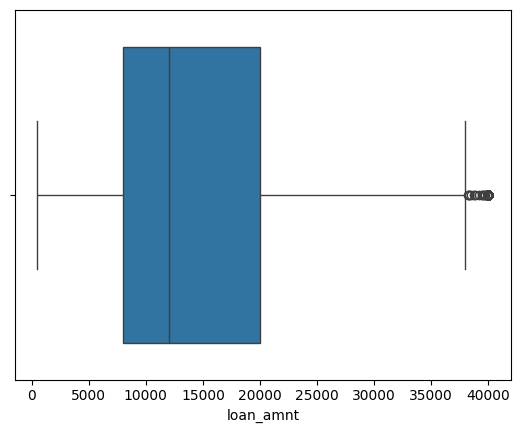

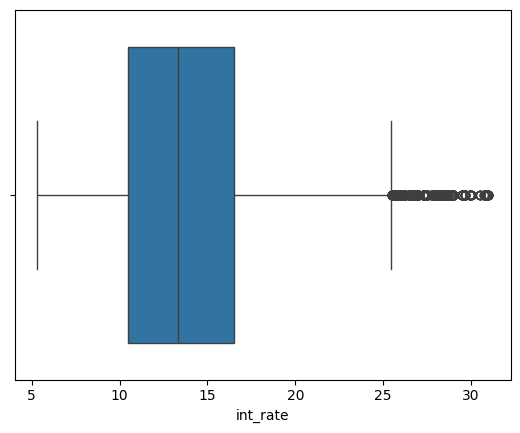

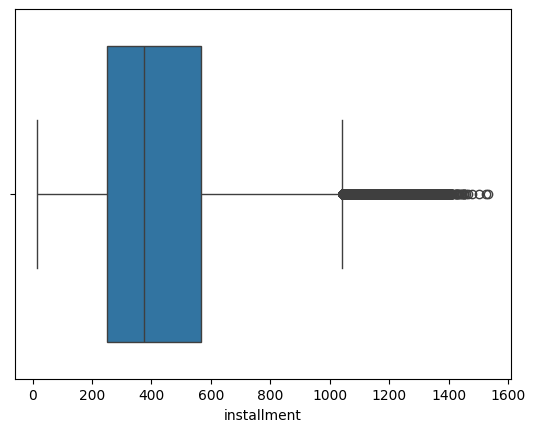

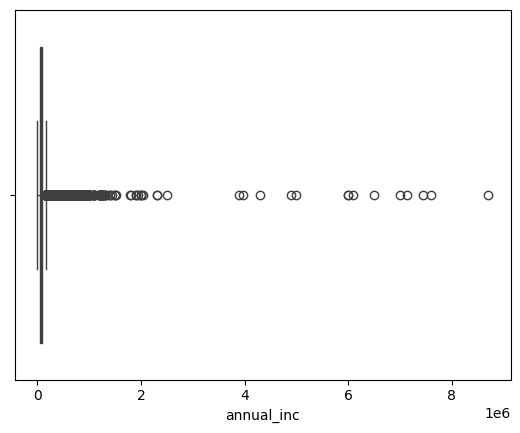

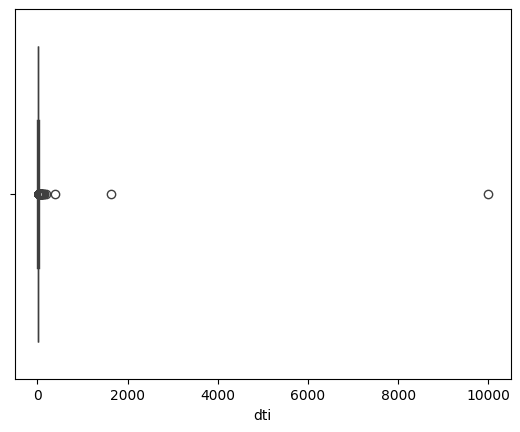

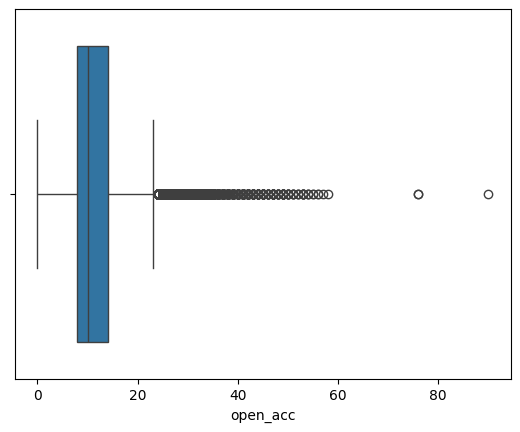

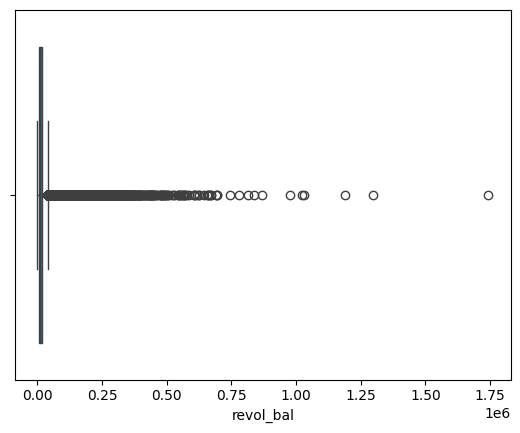

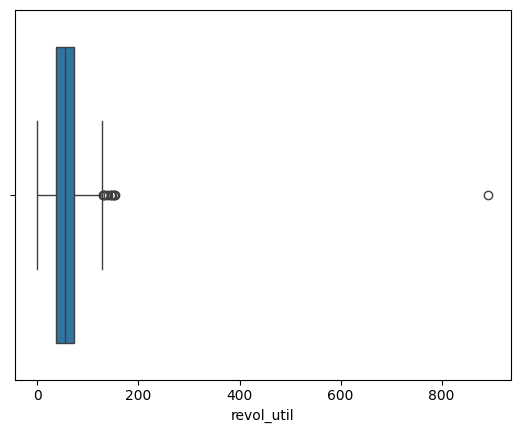

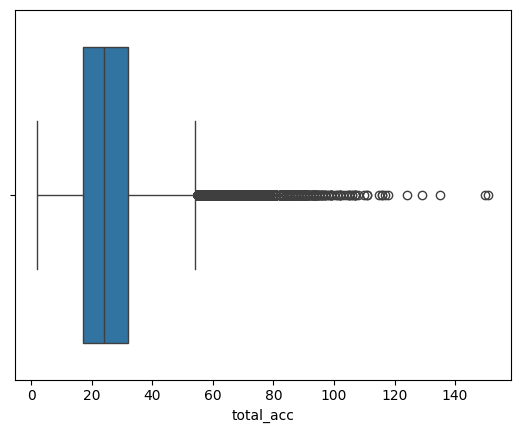

In [13]:
for i in num_columns:
    sns.boxplot(data=df,x=i)
    plt.show()

### Treating Outlier Using IQR method

In [14]:
for i in num_columns:
    q25=df[i].quantile(0.25)
    q75=df[i].quantile(0.75)

    IQR = q75-q25

    df = df[-((df[i] < (q25 - 1.5 * IQR)) | (df[i] > (q75 + 1.5 * IQR)))]
    df = df.reset_index(drop=True)

In [15]:
df.shape

(334720, 22)

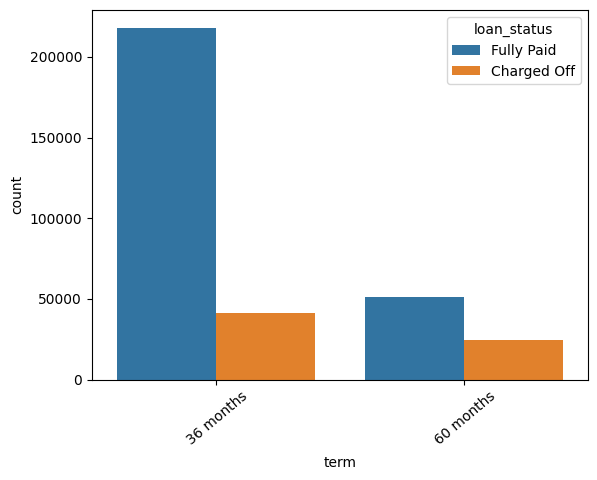

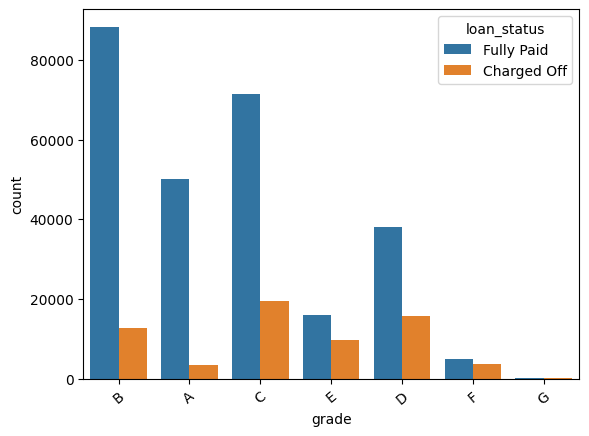

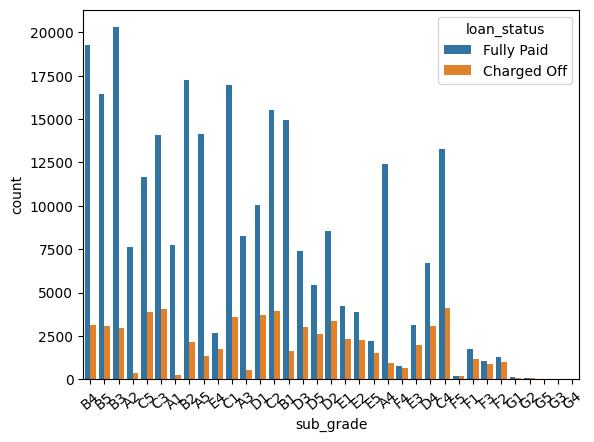

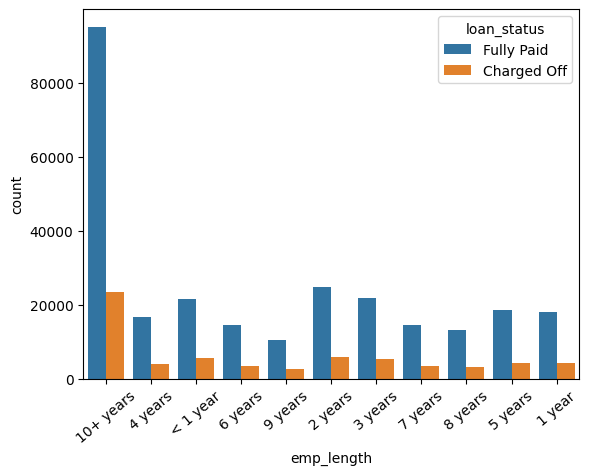

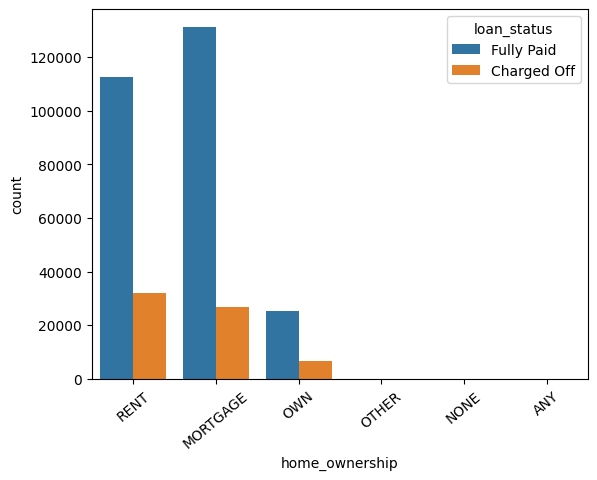

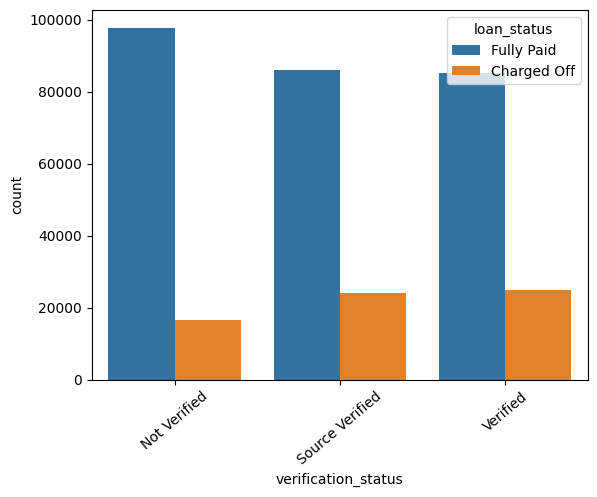

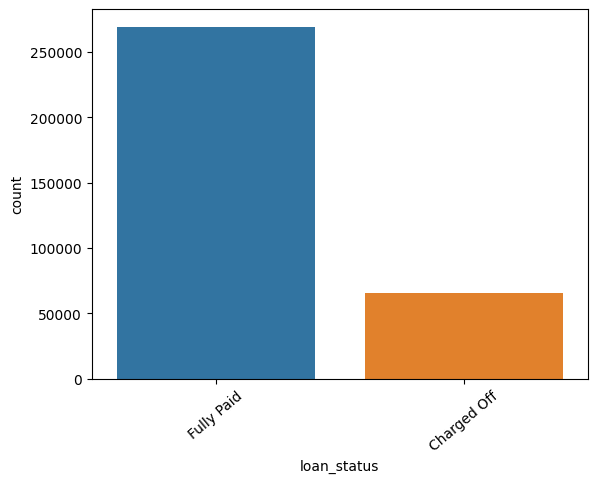

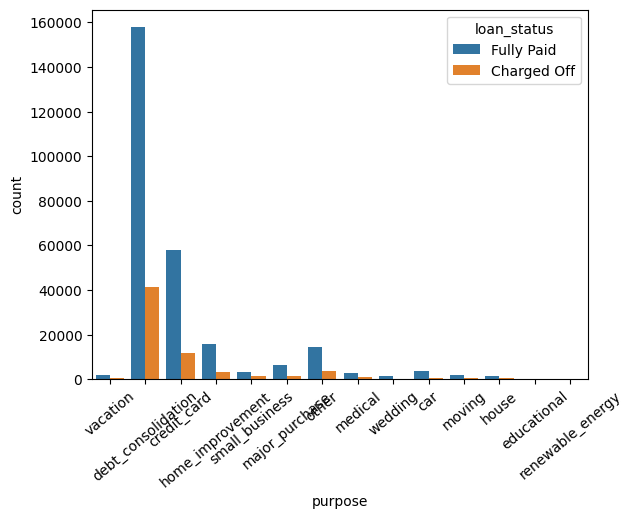

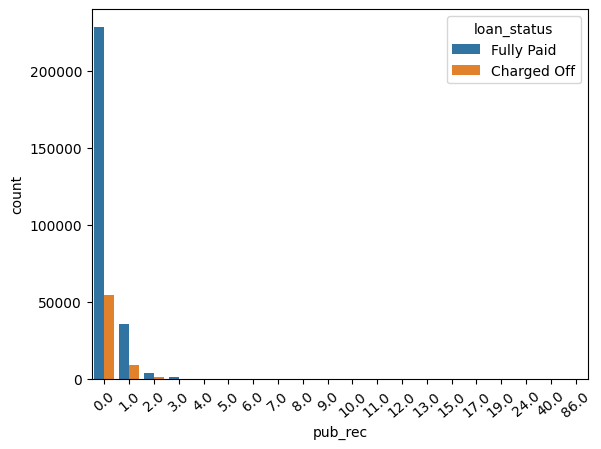

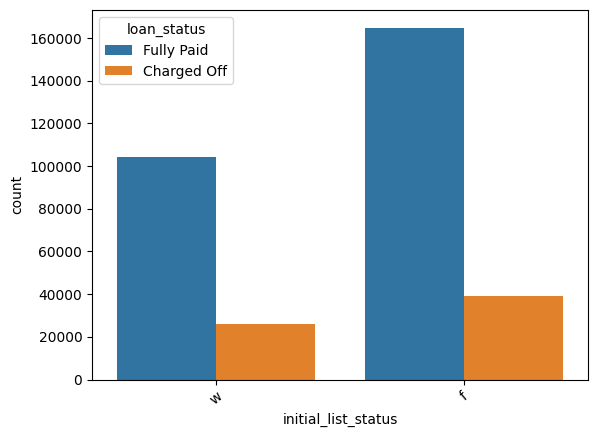

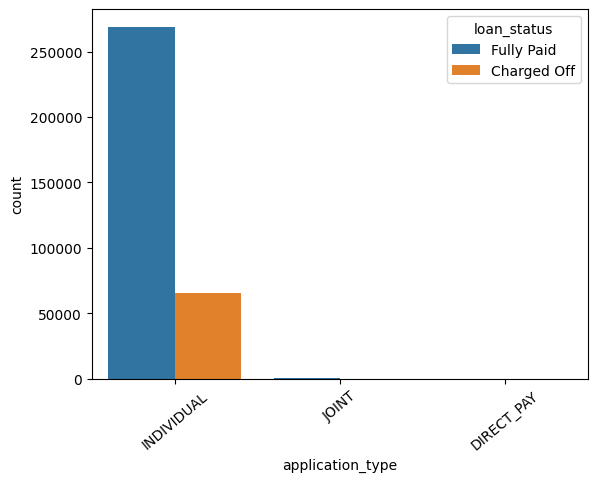

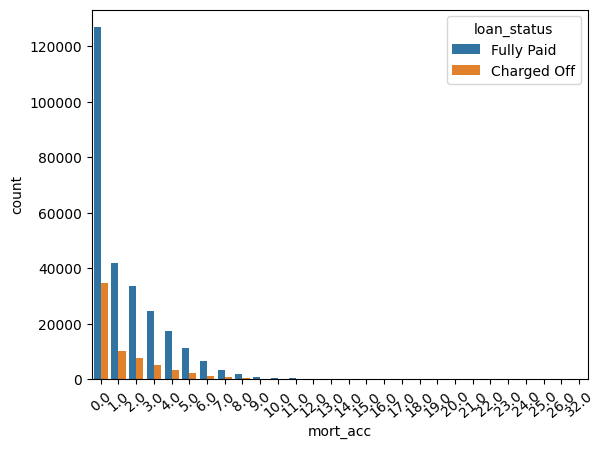

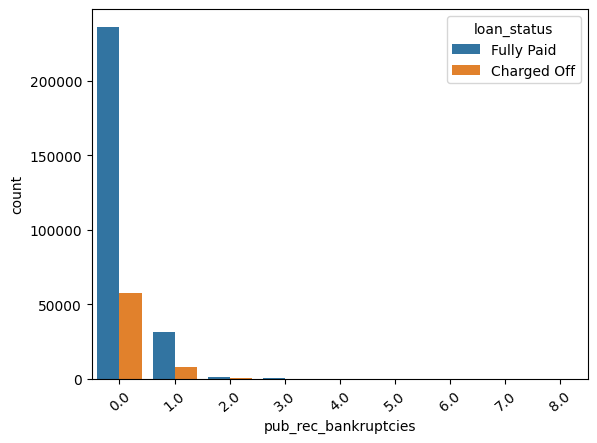

In [16]:
for i in cat_columns:
    sns.countplot(data=df,x=i,hue='loan_status')
    plt.xticks(rotation = 40)
    plt.show()

#### Feature Engineering

In [17]:
# Count encoding
ftr_clm=['grade','sub_grade','home_ownership','verification_status']
for i in ftr_clm:
  encoding = df[i].value_counts().to_dict()
  df[i] = df[i].map(encoding)

In [18]:
ftr_clm=['emp_length','term','application_type','initial_list_status','purpose','loan_status']
for i in ftr_clm:
  cat_type_count = df.groupby([i]).size().to_dict()
  ma=max(df.groupby([i]).size().to_dict().values())
  for key in cat_type_count.copy():
    if cat_type_count[key]==ma:
      cat_type_count[key]=1
    else:
      cat_type_count[key]=0
  df[i]=df[i].map(cat_type_count)

In [19]:
ftr_clm=['pub_rec_bankruptcies','mort_acc','pub_rec']
for i in ftr_clm:
  cat_type_count = df.groupby([i]).size().to_dict()
  for key in cat_type_count.copy():
    if key==0:
      cat_type_count[key]=0
    else:
      cat_type_count[key]=1
  df[i]=df[i].map(cat_type_count)


Checking multicolinearity between features

In [20]:
vif = pd.DataFrame()
vif['Features'] =df.columns
vif['VIF'] =[variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,loan_amnt,233.00
1,term,30.96
2,int_rate,25.17
3,installment,212.77
4,grade,60.28
5,sub_grade,56.43
6,emp_length,1.64
7,home_ownership,16.97
8,annual_inc,9.92
9,verification_status,838.65


<Axes: >

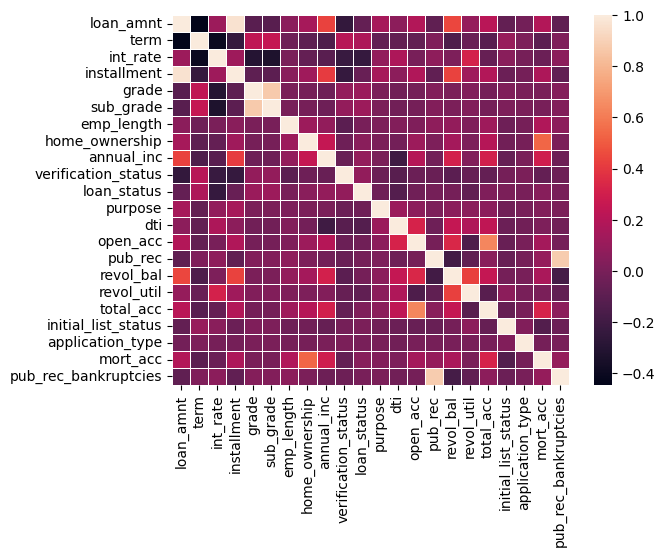

In [21]:
sns.heatmap(df.corr(method='spearman'),  linewidths=.5)

In [22]:
df.drop(columns='installment',inplace=True)

In [23]:
df.drop(columns='grade',inplace=True)

Scaling Using StandardScaler for Multicollinearity check

In [24]:
scaler = StandardScaler()
scaled=scaler.fit(df)
scaled=scaled.transform(df)
scaled=pd.DataFrame(scaled)
vif = pd.DataFrame()
vif['Features'] =df.columns
vif['VIF'] =[variance_inflation_factor(scaled.values, i) for i in range(scaled.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif

,Features,VIF
0,loan_amnt,1.85
1,term,1.59
2,int_rate,1.82
3,sub_grade,1.30
4,emp_length,1.06
5,home_ownership,1.04
6,annual_inc,1.59
7,verification_status,1.14
8,loan_status,1.09
9,purpose,1.04


Splitting the dataset

In [25]:
y=df[['loan_status']]
X=df.loc[:,~df.columns.isin(['loan_status'])]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [27]:
y_train.value_counts()

,count
loan_status,
1,188500
0,45804


Scalling using StandardScaler

In [28]:
scaler = StandardScaler()
scaled=scaler.fit(X_train)
X_train=scaled.transform(X_train)
X_test=scaled.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [30]:
reg=LogisticRegression(max_iter=1000)
reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

Performance Matrics for reg model

In [32]:
y_pred =reg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(reg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.805


In [33]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[ 1128 18588]
 [  945 79755]]


In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.06      0.10     19716
           1       0.81      0.99      0.89     80700

    accuracy                           0.81    100416
   macro avg       0.68      0.52      0.50    100416
weighted avg       0.76      0.81      0.74    100416



In [35]:
tp = conf_mat[1][1]
fp =conf_mat[0][1]
fn = conf_mat[1][0]
tn=conf_mat[0][0]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
tpr=fp/(fp+tn)
tnr=tn/(tn+fp)
print('precision=',precision)
print('Recall=',recall)
print('TPR=',tpr)
print('Specificity=',tnr)

precision= 0.8109880723589884
Recall= 0.9882899628252788
TPR= 0.9427875836883749
Specificity= 0.057212416311625075


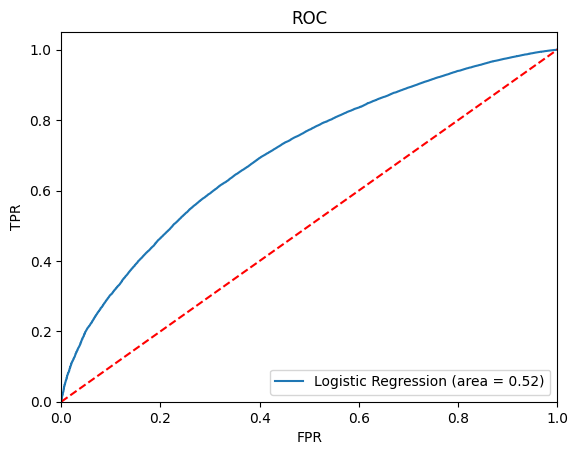

In [36]:
logit_roc_auc=roc_auc_score(y_test,reg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

### Oversampling using SMOTE


In [37]:
sm=SMOTE(random_state=42)
X_train,y_train=sm.fit_resample(X_train,y_train)

In [38]:
y_train.value_counts()

,count
loan_status,
0,188500
1,188500


In [39]:
reg=LogisticRegression(max_iter=1000)
reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [40]:
import pickle
pickle.dump(reg, open('model.pkl','wb'))

In [41]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
y_pred =model.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(model.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.642


In [42]:
conf_mat=confusion_matrix(y_test,y_pred)
print(conf_mat)

[[12872  6844]
 [29115 51585]]


In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.31      0.65      0.42     19716
           1       0.88      0.64      0.74     80700

    accuracy                           0.64    100416
   macro avg       0.59      0.65      0.58    100416
weighted avg       0.77      0.64      0.68    100416



In [44]:
tp = conf_mat[1][1]
fp =conf_mat[0][1]
fn = conf_mat[1][0]
tn=conf_mat[0][0]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
tpr=fp/(fp+tn)
tnr=tn/(tn+fp)
print('precision=',precision)
print('Recall=',recall)
print('TPR=',tpr)
print('Specificity=',tnr)

precision= 0.882866384843143
Recall= 0.6392193308550186
TPR= 0.3471292351389734
Specificity= 0.6528707648610266


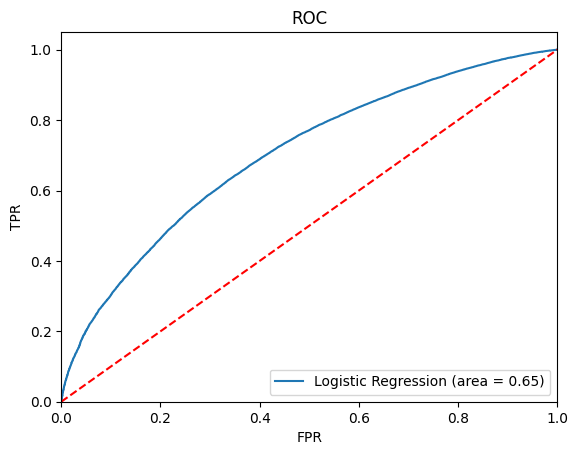

In [45]:
logit_roc_auc=roc_auc_score(y_test,model.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()